#📌 Урок: Модульная разработка для проекта интегрированного моделирования активов
# 📖 Теоретический минимум
## 🔹 Что такое модульная разработка?
Модульная разработка — это подход к созданию ПО, при котором программа разбивается на независимые, функционально завершенные компоненты (модули). Каждый модуль:

* Выполняет одну конкретную задачу

* Имеет четко определенный интерфейс

* Может разрабатываться и тестироваться отдельно

## 🔹 Основные принципы:

* Принцип единственной ответственности — один модуль = одна функция

* Низкая связность — модули минимально зависят друг от друга

* Высокая сцепленность — элементы внутри модуля тесно связаны

* Инкапсуляция — скрытие внутренней реализации

## 🔹 Преимущества:

* Упрощение разработки и отладки

* Возможность повторного использования кода

* Упрощение командной работы

* Гибкость при внесении изменений

## 📖  Лучшие практики
🔹 Для нефтегазового моделирования:

* Четкое разделение моделей - отдельные модули для IPR, VLP, узлового анализа

* Документация формул - явное описание используемых уравнений в docstring

* Параметризация расчетов - вынос констант в конфигурационные файлы

* Валидация входных данных - проверка физических ограничений параметров


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952









# 🏆 Задания

Вспомним прошлый семестр (https://colab.research.google.com/drive/1yWu1QHXWOmCFUbFpzgHlGx5MJnmC0vJG?usp=sharing) и на основе вашей реализации  скважин и притока создадим проект для интегрированного моделирования.


## 1️⃣  README.MD
**Задача:**
Создайте папку для вашего проекта и положите в нее текстовый файл README.MD , в котором объясните что это за проект, как у строен и как им пользоваться

Добавьте красивую схему формата
```
# Структура проекта
IMA_project/
├── main.py # Основной скрипт запуска программы
├── readme.md # Описание проекта и инструкции по использованию
├── requirements.txt # Список зависимостей Python для установки
├── nodal_analysis/
│
├── init.py # Инициализация пакета анализа узлов
│
└── solver.py # Реализация методов решения уравнений
    │
    ├── inflow_performance/
        │
        ├── init.py # Инициализация пакета входящей производительности
        │
        └── ipr_model.py # Модели IPR (Inflow Performance Relationship)
    │
    └── outflow_performance/
        ├── init.py # Инициализация пакета исходящей производительности
        └── vlp_model.py # Модели VLP (Vertical Lift Performance)


```

In [13]:
# IMA_project/
# ├── main.py
# ├── README.md
# ├── requirements.txt
# └── nodal_analysis/
#     ├── __init__.py
#     ├── nodal_analysis.py
#     ├── plotting.py
#     ├── inflow_performance/
#     │   ├── __init__.py
#     │   └── ipr_model.py
#     └── outflow_performance/
#         ├── __init__.py
#         └── vlp_model.py


## 2️⃣ Создание базового пакета для узлового анализа
**Задача:**

Создать пакет nodal_analysis с модулями:

nodal_analysis.py - основной расчет

plotting.py - визуализация результатов



Результаты узлового анализа:
Узловой дебит: 172.41 м3/сут
Узловое давление: 127.59 бар


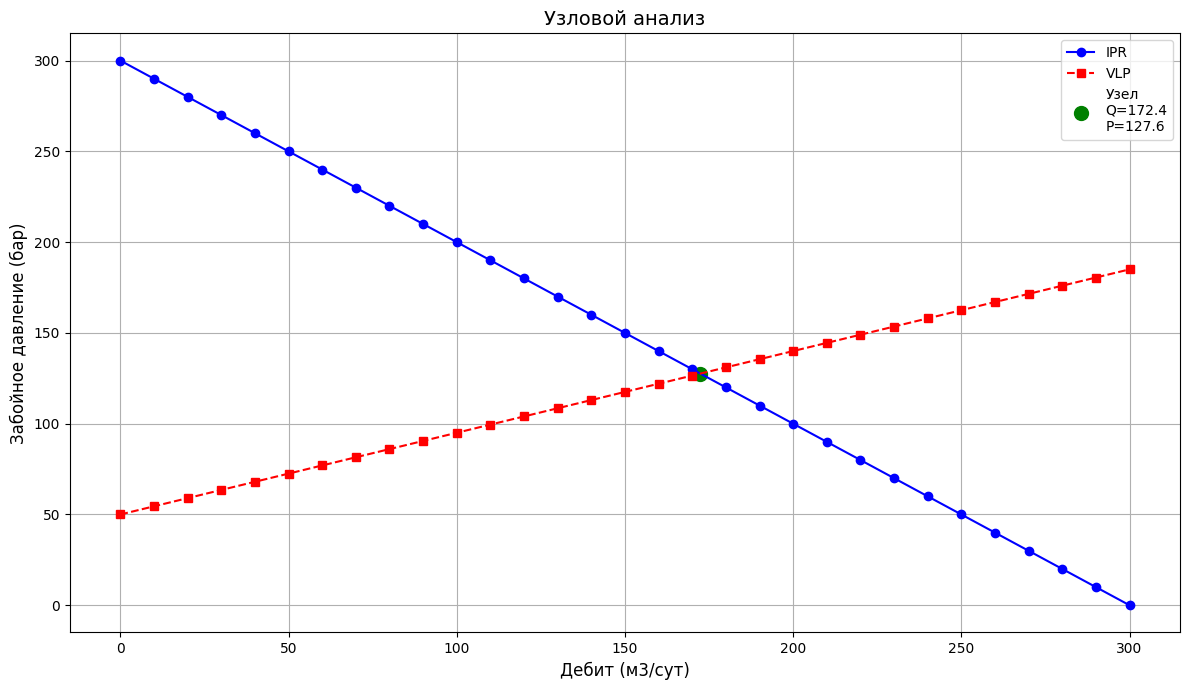

In [1]:
from nodal_analysis import InflowWell, VLPModel, NodalAnalysis

p_e = 300                   # Пластовое давление, бар
p_w = 30                   # Забойное даление, бар
k_pr = 1                    # Коэффициент продуктивности, м3/сут/бар
wellhead_pressure=50       # Устьевое давление, бар
hydraulic_loss_coeff=0.45    # Коэффициент потерь, бар/(м3/сут)
q_max = 300                 # Максимальный дебит, м3/сут
time = 10                   # Время, сут

ipr_well = InflowWell(k_pr, p_e, p_w)
vlp_model = VLPModel(wellhead_pressure, hydraulic_loss_coeff)

nodal_analyzer = NodalAnalysis(ipr_well, vlp_model)
q, p = nodal_analyzer.calculate_nodal_point()

results = nodal_analyzer.get_results()
print("Результаты узлового анализа:")
print(f"Узловой дебит: {results['nodal_rate']:.2f} м3/сут")
print(f"Узловое давление: {results['nodal_pressure']:.2f} бар")


nodal_analyzer.plot_results(q_max)


## 3️⃣  Работа с init.py
**Задача:**

Настроить экспорт функций в пакете inflow_performance

inflow_performance/init.py

---



In [ ]:
# from .ipr_model import InflowWell, InvertedWell
# __all__ = ['InflowWell', 'InvertedWell']


## 4️⃣   Создание многоуровневого пакета


**Задача:**  

Свои пакеты для моделирования скважины и пласта сделайте подпакетами  nodal_analysis

---




In [2]:
import nodal_analysis.inflow_performance


## 5️⃣ Создание requirements.txt

**Задача:**

Создать файл зависимостей для проекта вида

requirements.txt:

numpy>=1.21.0

pandas>=1.3.0

matplotlib>=3.4.0

scipy>=1.7.0

pytest>=6.2.0

---


In [11]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
f = open('requirements.txt','r')
print(*f)

aext-assistant @ file:///C:/b/abs_7e0qjcige6/croot/aext-assistant_1717062202219/work
 aext-assistant-server @ file:///C:/b/abs_261y2c9vsm/croot/aext-assistant-server_1717060019302/work
 aext-core @ file:///C:/b/abs_1e882xlg8y/croot/aext-core_1717056431204/work
 aext-core-server @ file:///C:/b/abs_24av6ljtvu/croot/aext-core-server_1717075079138/work
 aext-panels @ file:///C:/b/abs_44bc4hv663/croot/aext-panels_1717062218055/work
 aext-panels-server @ file:///C:/b/abs_7f9_48fhp3/croot/aext-panels-server_1717060738001/work
 aext-share-notebook @ file:///C:/b/abs_4bhc14ko2x/croot/aext-share-notebook_1717059348177/work
 aext-share-notebook-server @ file:///C:/b/abs_2b3c16a8t0/croot/aext-share-notebook-server_1717057990383/work
 aext-shared @ file:///C:/b/abs_1ex0tj8g9m/croot/aext-shared_1716991146845/work
 aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
 aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
 aioitertools @ file:///tmp/build/807